<a href="https://colab.research.google.com/github/xdr100/5241HW/blob/main/HW2Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo using the transition semigroup. As illustrated below, the MC results,  a function of $\tau$, converges to function $g(\tau)$ in part b, as T increasing.   
I am not sure if the question is asking about the Monte Carlo simulation for $\frac{1}{T}\int_0^T y(X^{st}_{t+\tau})y(X^{st}_{t})dt-\mu^2$ or $E[\frac{1}{T}\int_0^T y(X^{st}_{t+\tau})y(X^{st}_{t})dt]-\mu^2$, so I implement both.

#1 
 Monte Carlo of $\frac{1}{T}\int_0^T y(X^{st}_{t+\tau})y(X^{st}_{t})dt-\mu^2$, as T increasing

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from numpy import linalg as LA


N=1 #Monte Carlo sample size
TIME_STEP=0.01

tau=0.5
alpha=5
b=3
beta=alpha*b
G= np.array([[-1-b, 1, b], 
    [b, -1-b, 1],
    [1,b, -1-b]])*alpha
Y_STATE=[-1,0,1]
P_initial=[1/3,1/3,1/3]

def SIMULATION(T):
    TIME_NUM=int(T/TIME_STEP)
    STATE_COLLECTION=np.array(random.choices(Y_STATE, weights=P_initial,k=N)).reshape(-1,1) #initial state
    #JUMP_TIME=np.zeros([N,1])
    #Matrix exponential
    w, v = LA.eig(G)
    P_delta_t=np.matmul(np.matmul(v,np.diag(np.exp(w*TIME_STEP))),np.conjugate(v)) #semigroup
    P_delta_t=np.real(P_delta_t) #remvoe the numerical error on the imag part

    for t in range(TIME_NUM):
        #INTERVAL_t=np.zeros([N,1])
        STATE_t=np.zeros([N,1])
        for n in range(N):
            #jump interval
            Y_indicator=STATE_COLLECTION[n,t]+1 #python array index is the state value +1
            #exponential_lambda=-G[Y_indicator,Y_indicator]
            #interval=-np.log(random.uniform(0,1))/exponential_lambda
            #INTERVAL_t[n,0]=interval
            #new state
            P_state=P_delta_t[Y_indicator,:].copy() #which row of the transition group to use
            #P_state=P_state/P_state.sum()
            newstate=random.choices(Y_STATE, weights=P_state)[0]
            STATE_t[n,0]=newstate
        #JUMP_TIME=np.concatenate([JUMP_TIME,(JUMP_TIME[:,-1].reshape(N,1)+INTERVAL_t)],1)
        STATE_COLLECTION=np.concatenate([STATE_COLLECTION,STATE_t],1).astype(int)
    return STATE_COLLECTION

def g(tau):
    #function in 2b
    return 1/3*np.exp(tau*(alpha+beta)*(-3/2))*2*np.cos(np.sqrt(3)/2*tau*(beta-alpha))

def f(tau,T,STATE_COLLECTION):
    #integral
    TIME_NUM_INTEGRAL=int((T-tau)/TIME_STEP) #-1 to ensure not out of range
    EXTRA_STEP=int(tau/TIME_STEP)
    INTEGRAL=np.zeros(N)
    for n in range(N):
      integral_sample_n=0.0
      for t in range(TIME_NUM_INTEGRAL):
        INTEGRAND=STATE_COLLECTION[n,t]*STATE_COLLECTION[n,(t+EXTRA_STEP)]
        integral_sample_n=integral_sample_n+INTEGRAND*TIME_STEP
      INTEGRAL[n]=integral_sample_n
    return (INTEGRAL/T).mean()

In [15]:
TAU_LIST=np.arange(0.1,10.1,0.1)

T_LIST=[10,100,500,1000]
#T_LIST=[10,100,500]

MC_RESULT=np.zeros([len(T_LIST),len(TAU_LIST)])
THEORY=np.zeros([len(T_LIST),len(TAU_LIST)])
T=T_LIST[0]
for tau_i in range(len(TAU_LIST)):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[0,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[0,tau_i]=g(tau)

T=T_LIST[1]
for tau_i in range(len(TAU_LIST)):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[1,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[1,tau_i]=g(tau)

T=T_LIST[2]
for tau_i in tqdm(range(len(TAU_LIST))):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[2,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[2,tau_i]=g(tau)

T=T_LIST[3]
for tau_i in tqdm(range(len(TAU_LIST))):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[3,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[3,tau_i]=g(tau)

100%|██████████| 100/100 [18:54<00:00, 11.34s/it]


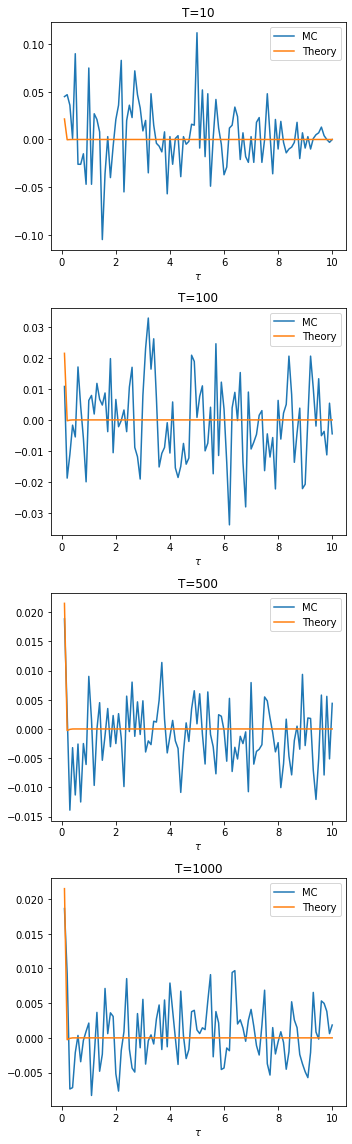

In [18]:
plt.figure(figsize=(5, 16))
plt.subplot(411)
plt.plot(TAU_LIST,MC_RESULT[0,:],label='MC')
plt.plot(TAU_LIST,THEORY[0,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[0]))

plt.subplot(412)
plt.plot(TAU_LIST,MC_RESULT[1,:],label='MC')
plt.plot(TAU_LIST,THEORY[1,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[1]))

plt.subplot(413)
plt.plot(TAU_LIST,MC_RESULT[2,:],label='MC')
plt.plot(TAU_LIST,THEORY[2,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[2]))

plt.subplot(414)
plt.plot(TAU_LIST,MC_RESULT[3,:],label='MC')
plt.plot(TAU_LIST,THEORY[3,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[3]))
plt.tight_layout()

#2 
Monte Carlo mean of $E[\frac{1}{T}\int_0^T y(X^{st}_{t+\tau})y(X^{st}_{t})dt]-\mu^2$ as T increasing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from numpy import linalg as LA


N=10 #Monte Carlo sample size
TIME_STEP=0.01

tau=0.5
alpha=5
b=3
beta=alpha*b
G= np.array([[-1-b, 1, b], 
    [b, -1-b, 1],
    [1,b, -1-b]])*alpha
Y_STATE=[-1,0,1]
P_initial=[1/3,1/3,1/3]

def SIMULATION(T):
    TIME_NUM=int(T/TIME_STEP)
    STATE_COLLECTION=np.array(random.choices(Y_STATE, weights=P_initial,k=N)).reshape(-1,1) #initial state
    #JUMP_TIME=np.zeros([N,1])
    #Matrix exponential
    w, v = LA.eig(G)
    P_delta_t=np.matmul(np.matmul(v,np.diag(np.exp(w*TIME_STEP))),np.conjugate(v)) #semigroup
    P_delta_t=np.real(P_delta_t) #remvoe the numerical error on the imag part

    for t in range(TIME_NUM):
        #INTERVAL_t=np.zeros([N,1])
        STATE_t=np.zeros([N,1])
        for n in range(N):
            #jump interval
            Y_indicator=STATE_COLLECTION[n,t]+1 #python array index is the state value +1
            #exponential_lambda=-G[Y_indicator,Y_indicator]
            #interval=-np.log(random.uniform(0,1))/exponential_lambda
            #INTERVAL_t[n,0]=interval
            #new state
            P_state=P_delta_t[Y_indicator,:].copy() #which row of the transition group to use
            #P_state=P_state/P_state.sum()
            newstate=random.choices(Y_STATE, weights=P_state)[0]
            STATE_t[n,0]=newstate
        #JUMP_TIME=np.concatenate([JUMP_TIME,(JUMP_TIME[:,-1].reshape(N,1)+INTERVAL_t)],1)
        STATE_COLLECTION=np.concatenate([STATE_COLLECTION,STATE_t],1).astype(int)
    return STATE_COLLECTION

def g(tau):
    #function in 2b
    return 1/3*np.exp(tau*(alpha+beta)*(-3/2))*2*np.cos(np.sqrt(3)/2*tau*(beta-alpha))

def f(tau,T,STATE_COLLECTION):
    #integral
    TIME_NUM_INTEGRAL=int((T-tau)/TIME_STEP) #-1 to ensure not out of range
    EXTRA_STEP=int(tau/TIME_STEP)
    INTEGRAL=np.zeros(N)
    for n in range(N):
      integral_sample_n=0.0
      for t in range(TIME_NUM_INTEGRAL):
        INTEGRAND=STATE_COLLECTION[n,t]*STATE_COLLECTION[n,(t+EXTRA_STEP)]
        integral_sample_n=integral_sample_n+INTEGRAND*TIME_STEP
      INTEGRAL[n]=integral_sample_n
    return (INTEGRAL/T).mean()

In [ ]:
TAU_LIST=np.arange(0.1,10.1,0.1)

#T_LIST=[10,100,500,1000]
T_LIST=[10,100,500]

MC_RESULT=np.zeros([len(T_LIST),len(TAU_LIST)])
THEORY=np.zeros([len(T_LIST),len(TAU_LIST)])
T=T_LIST[0]
for tau_i in range(len(TAU_LIST)):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[0,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[0,tau_i]=g(tau)

T=T_LIST[1]
for tau_i in range(len(TAU_LIST)):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[1,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[1,tau_i]=g(tau)

T=T_LIST[2]
for tau_i in tqdm(range(len(TAU_LIST))):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[2,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[2,tau_i]=g(tau)

"""T=T_LIST[3]
for tau_i in tqdm(range(len(TAU_LIST))):
    tau=TAU_LIST[tau_i]
    STATE_COLLECTION=SIMULATION(T)
    MC_RESULT[3,tau_i]=f(tau,T,STATE_COLLECTION)
    THEORY[3,tau_i]=g(tau)
"""

100%|██████████| 100/100 [44:56<00:00, 26.97s/it]


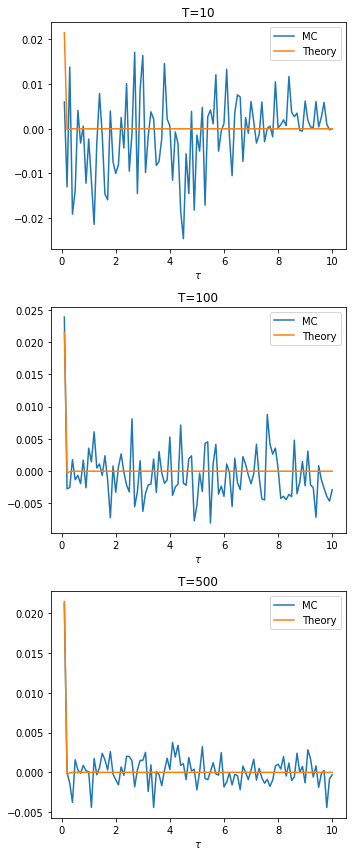

In [ ]:
plt.figure(figsize=(5, 12))
plt.subplot(311)
plt.plot(TAU_LIST,MC_RESULT[0,:],label='MC')
plt.plot(TAU_LIST,THEORY[0,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[0]))

plt.subplot(312)
plt.plot(TAU_LIST,MC_RESULT[1,:],label='MC')
plt.plot(TAU_LIST,THEORY[1,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[1]))

plt.subplot(313)
plt.plot(TAU_LIST,MC_RESULT[2,:],label='MC')
plt.plot(TAU_LIST,THEORY[2,:],label='Theory')
plt.legend()
plt.xlabel(r'$\tau$')
plt.title("T={}".format(T_LIST[2]))
plt.tight_layout()